In [1]:
from bs4 import BeautifulSoup
import requests
import time

In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('http://www.aastocks.com/en/stocks/news/aafn-company-news')
time.sleep(2)
''' execute_script("window.scrollBy(x-pixels,y-pixels)")
    scroll down the page by  1000 pixel vertical
'''
for i in range(50):
    driver.execute_script("window.scrollBy(0,2000)")
    time.sleep(0.5)




====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Driver [C:\Users\Kevin Wong 0413\.wdm\drivers\chromedriver\win32\97.0.4692.71\chromedriver.exe] found in cache


## Parse data

In [3]:

# Make a GET request to fetch the raw HTML content

soup = BeautifulSoup(driver.page_source, "lxml")

#soup = BeautifulSoup(requests.post(url, data=data).content, 'html.parser')
# Parse the html content
#soup = BeautifulSoup(html_content, "lxml")
 # print the parsed data of html

### headline

In [4]:
data = soup.find("div", attrs={"id": "aafn-search-c1"}).find_all("a",href=True)[0:]

In [5]:
len(data[0].text)

0

In [6]:
data[0]['href']

'/en/stocks/news/aafn-con/NOW.1155219/company-news'

In [7]:
Headline = []
href = []
for i in range(len(data)):
    if len(data[i].text) != 0:
        Headline.append(data[i].text)
        href.append(data[i]['href'])

In [8]:
Headline , len(Headline), href

(['HKD1.2B Southbound Trading Net Inflow to TENCENT',
  'PICC P&C 2021 Original Insurance Premium Income Up 3.8% YoY to RMB448.38B',
  'State Council Foresees CN Online Retail Sales at RMB17T by 2025, e-Commerce Deals RMB46T',
  'PETROCHINA Projects 2021 NP to Rally 374-395% YoY',
  'State Council: CN Value-added of Digital Econ Core Industries To Hit 10% of GDP in 2025',
  'Li Ka-shing Adds 266K More CK ASSET Shrs',
  'PICC GROUP: PICC P&C 2021 Original Premiums Income +3.8% YoY to RMB448.38B',
  '<Full-day Takeaway>Top 5 Gainers among ETFs; XL2CSOPHSTECH (07226.HK) Surges 9.7% Topping Chart',
  '<IPO News>DiDi In Talks with HKEX for Secondary Listing in 2Q: Report',
  'CN Food & Beverage Names Brisk; Meituan, Jiumaojiu Up 9%, 14%',
  "<Research Report>BOCI Cites Geely: Sector Faces 10-30% Battery Price Hike, To Offset by CATL JV's 2H Production",
  "SUNAC Clarifies: Subsidiary's Stake Freeze by Court Resolved; Shr Narrows Drop after Midday",
  'CN 2021 Power Battery Sales Vol. +182.3

### time and polarity

In [9]:
time_list=[]
polarity=[]

In [10]:
data2 = soup.find_all("div", attrs={"class": "newstime4"})

In [11]:
data2[0].text[:17]

' 2022/01/12 18:25'

In [12]:
data2[0].find_all('div',{'class':'value'})[1].text

'48'

In [13]:
for i in range(len(data2)):
    if len(data2[i].text) != 0:
        #print(i)
        if i <=40:
            time_list.append(data2[i].div.text[:-1])
            polarity.append(data2[i].find_all('div',{'class':'value'})[1].text)
        else:
            time_list.append(data2[i].div.text)
            polarity.append(data2[i].find_all('div',{'class':'value'})[1].text)

In [14]:
len(time_list),time_list

(300,
 ['2022/01/12 18:25',
  '2022/01/12 17:51',
  '2022/01/12 17:39',
  '2022/01/12 17:33',
  '2022/01/12 17:27',
  '2022/01/12 17:13',
  '2022/01/12 17:06',
  '2022/01/12 16:30',
  '2022/01/12 15:59',
  '2022/01/12 15:50',
  '2022/01/12 15:34',
  '2022/01/12 15:34',
  '2022/01/12 14:45',
  '2022/01/12 14:28',
  '2022/01/12 14:22',
  '2022/01/12 14:16',
  '2022/01/12 14:09',
  '2022/01/12 14:04',
  '2022/01/12 13:48',
  '2022/01/12 13:38',
  '2022/01/12 13:2',
  '2022/01/12 13:26',
  '2022/01/12 13:24',
  '2022/01/12 13:23',
  '2022/01/12 13:21',
  '2022/01/12 13:21',
  '2022/01/12 12:55',
  '2022/01/12 12:46',
  '2022/01/12 12:30',
  '2022/01/12 12:10',
  '2022/01/12 12:08',
  '2022/01/12 11:50',
  '2022/01/12 11:44',
  '2022/01/12 11:38',
  '2022/01/12 11:35',
  '2022/01/12 11:30',
  '2022/01/12 11:16',
  '2022/01/12 11:13',
  '2022/01/12 11:10',
  '2022/01/12 10:55',
  '2022/01/12 10:52',
  '2022/01/12 10:52',
  '2022/01/12 10:50',
  '2022/01/12 10:44',
  '2022/01/12 10:37',
  '20

In [15]:
len(polarity)

300

### abstract,stock code and company name

In [16]:
import re
head = 'http://www.aastocks.com'

In [17]:
abstract_list = []
stock_code_list = []
stock_name_list = []
for i in range(len(href)):
    url=head+href[i]
    #print(url)

    html_content = requests.get(url).text
    soup = BeautifulSoup(html_content, "lxml")
    
    stock_code = []
    abstract=soup.find_all('p')
    if len(abstract) == 0:
        abstract = ''
        abstract_list.append('')
        stock_code.append('')
    else:
    #print(abstract)
    #print(abstract)
        abstract_list.append(abstract[0].text.replace('\xa0',''))
        it = re.finditer(r'\d+'+".HK", abstract[0].text.replace('\xa0',''))
        for match in it: 
            if match.group() not in stock_code:
                stock_code.append(match.group())
    stock_code_list.append(stock_code)
    
    

In [18]:
#this code is slow 
stock_name_list = []
head2='https://money18.on.cc/info/hk/liveinfo_quote_'
tail2='.html'
for j in range(len(stock_code_list)):
    stock_name = []
    for k in stock_code_list[j]:
        url = head2+str(k[:-3])+tail2
        driver.get(url)
        soup = BeautifulSoup(driver.page_source, "lxml")
        text = soup.find('title').text[:-16]
        if len(text)!=0: 
            stock_name.append(text)
    stock_name_list.append(stock_name)

In [19]:
# an exsiting solution 

In [20]:
len(stock_code_list)

300

In [21]:
import pandas as pd

In [22]:
df = pd.DataFrame(Headline,columns=['headline'])
df['time']=time_list
df['company_name']=stock_name_list
df['stock_code']=stock_code_list
df['abstract']=abstract_list
df['polarity']=polarity

In [23]:
df.to_csv('data.csv')

In [ ]:
parse_data=pd.read_csv('data.csv')

## Perform sentiment analysis

### tagging

In [ ]:
labels = ['Negative','Neutrual','Positive']

In [24]:
import numpy as np

In [25]:
low_thre,high_thre=pd.Series(polarity).astype(int).quantile(0.333),pd.Series(polarity).astype(int).quantile(0.666)

In [26]:
label = []
for i in polarity:
    if int(i)<=low_thre:
        label.append(0)
    elif int(i)<=high_thre:
        label.append(1)
    else:
        label.append(2)


### preprocessing

In [27]:
import string # from some string manipulation tasks
import nltk # natural language toolkit
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence
from nltk.stem import SnowballStemmer # For stemming the sentence
from autocorrect import Speller #correcting the spellings

In [28]:
#ref:https://cnvrg.io/sentiment-analysis-python/?gclid=Cj0KCQiA8vSOBhCkARIsAGdp6RSlGJkCvA015o9tOHuDE3vFI9vsFL7n0rL9PJDi5y1oeeGgLUN2kPYaAma_EALw_wcB
def sentence_tokenize(text):
    return nltk.sent_tokenize(text) 


def to_lower(text):
        """
        :param text:
        :return:
            Converted text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
        """
        return text.lower() 
    
def remove_stopwords(sentence):
        """
        removes all the stop words like "is,the,a, etc."
        """
        stop_words = stopwords.words('english')
        return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words]) 

def remove_punct(text):
  
        return ''.join(c for c in text if c not in punctuation)     

def lemmatize(text):
    wordnet_lemmatizer = WordNetLemmatizer()

    lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for word in nltk.word_tokenize(text)]
    return " ".join(lemmatized_word) 

def word_tokenize(text):
        return nltk.word_tokenize(text) 
 
    
def remove_numbers(text):
        output = ''.join(c for c in text if not c.isdigit())
        return output 

In [29]:
def preprocess(text):
    lower_text = to_lower(text)
    sentence_tokens = sentence_tokenize(lower_text)
    word_list = []
    for each_sent in sentence_tokens:
        lemmatizzed_sent = lemmatize(each_sent)
        clean_text = remove_numbers(lemmatizzed_sent)
        clean_text = remove_punct(clean_text)
        clean_text = remove_stopwords(clean_text)
        word_tokens = word_tokenize(clean_text)
        for i in word_tokens:
            word_list.append(i)
    return word_list

### MLP

In [30]:
# Use a simple MLP

In [31]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
df_data = pd.DataFrame(abstract_list,columns=['DATA_COLUMN'])
df_data['LABEL']=label

In [33]:
Train = df_data[:239]
Test = df_data[240:]

In [34]:
Train

,DATA_COLUMN,LABEL
0,"There was HKD1.2 billion, HKD1.1 billion and H...",1
1,PICC P&C (02328.HK)-0.060 (-0.845%) Short sell...,0
2,"China's State Council issued the ""14th Five-Ye...",2
3,PETROCHINA (00857.HK)+0.120 (+3.243%) Short se...,2
4,The State Council issued the 14th Five-Year Pl...,2
...,...,...
234,C FIN INT INV (00721.HK)+0.002 (+2.000%) anno...,0
235,Morgan Stanley believed HUA HONG SEMI (01347.H...,1
236,,0
237,Morgan Stanley expected formal vocational educ...,0


In [35]:
vectorizer = TfidfVectorizer(stop_words='english',lowercase=True)


train_features= vectorizer.fit_transform(Train['DATA_COLUMN'])
test_features= vectorizer.transform(Test['DATA_COLUMN'])

In [36]:
test_features

<60x3731 sparse matrix of type '<class 'numpy.float64'>'
	with 2841 stored elements in Compressed Sparse Row format>

In [37]:
classifier = MLPClassifier(hidden_layer_sizes=(128,),max_iter=200,activation='relu',solver='sgd',
                           learning_rate='invscaling',batch_size=30,random_state=1)

In [38]:
%%time
classifier.fit(train_features,Train['LABEL'])

Wall time: 1.56 s


MLPClassifier(batch_size=30, hidden_layer_sizes=(128,),
              learning_rate='invscaling', random_state=1, solver='sgd')

In [39]:
predictions = classifier.predict(test_features)

In [40]:
predictions # useless

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [76]:
accuracy_mlp = metrics.accuracy_score(Test['LABEL'],predictions)
accuracy_mlp

0.3

In [77]:
from sklearn.metrics import recall_score
recall_mlp = metrics.recall_score(Test['LABEL'],predictions,average='weighted')
recall_mlp

0.3

In [43]:
# the model is bias, maybe need a mlp with several hiiden layers
# but one of the fact is that I could only parse 300 pages of textual data in that webpage

### complex MLP

In [44]:

import torch #pytorch
import torch.nn as nn #for our model class
import torch.nn.functional as F
from nltk.corpus import stopwords #removing stop words
from collections import Counter #counting the unique numbers
import string 
import re #regex
import seaborn as sns #plotting
import matplotlib.pyplot as plt #plotting
from torch.utils.data import TensorDataset, DataLoader #data prep
from sklearn.model_selection import train_test_split #splitting the dataset for training and testing 

In [45]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')

In [46]:
df_sentence = pd.Series(abstract_list).apply(preprocess)
df_data = pd.DataFrame(df_sentence,columns=['DATA_COLUMN'])
df_data["LABEL"]=label

In [47]:
vocab = build_vocab_from_iterator(df_data["DATA_COLUMN"])

In [48]:
encoding = []
for i in range(300):
    encoding.append(np.concatenate((np.array(vocab(df_data["DATA_COLUMN"][i])).T,np.zeros(500-len(np.array(df_data["DATA_COLUMN"][i]).T))),axis=0))

In [49]:
x_train = encoding[:239]
x_test = encoding[240:]

In [50]:
len(np.array(x_train[0]).T)

500

In [51]:
x_train_torch=torch.Tensor(x_train).to(torch.int64)
x_test_torch=torch.Tensor(x_test).to(torch.int64)

<ipython-input-51-5f49cde423a7>:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  x_train_torch=torch.Tensor(x_train).to(torch.int64)


In [52]:
train_data = TensorDataset(x_train_torch, torch.from_numpy(df_data['LABEL'][:239].values))
valid_data = TensorDataset(x_test_torch, torch.from_numpy(df_data['LABEL'][240:].values))

In [53]:
batch_size = 30

In [54]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size,drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size,drop_last=True)

In [55]:
train_loader

In [56]:
class SentimentRNN(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5): 
        super(SentimentRNN,self).__init__()
 
        self.output_dim = output_dim #output dimensions
        self.hidden_dim = hidden_dim #hidden dimensions
  
        self.no_layers = no_layers #number of layers
        self.vocab_size = vocab_size #vocabulary size
    
        # embedding 
        self.embedding = nn.Embedding(vocab_size, embedding_dim) #embedding of vocabulary size and embedding dimensions        
        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.4)
    
        # linear and sigmoid layer
        self.fc0 = nn.Linear(self.hidden_dim, 512) #first drop out
        self.fc1 = nn.Linear(512, 256) #1st fc layer
        self.dropout1 = nn.Dropout(0.2) #2nd drop out
        self.fc = nn.Linear(256, output_dim) #2nd fully connected layer
        self.sig = nn.Sigmoid() #for last layer
        
    def forward(self,x,hidden):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
        #print(embeds.shape)  #[50, 500, 1000]
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 
        
        # dropout and fully connected layer
        out = self.dropout(lstm_out)
        out = self.fc0(out)
        out = self.dropout1(out)
        out = self.fc1(out)
        out = self.fc(out)
        
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)

        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
        
        
        
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden

In [57]:
device = torch.device("cpu")
no_layers = 4 #4 hidden LSTM stacked layers
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64 # embedding dimensions
output_dim = 1 #single output 1 or 0
hidden_dim = 256 # hidden dimensions
model = SentimentRNN(no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob=0.5)
#moving to gpu if available
model.to(device) 

SentimentRNN(
  (embedding): Embedding(3295, 64)
  (lstm): LSTM(64, 256, num_layers=4, batch_first=True)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc0): Linear(in_features=256, out_features=512, bias=True)
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)

In [58]:
len(vocab)

3294

In [59]:
def acc(pred,label):
    pred = torch.round(pred.squeeze()) #remove extra dimensions
    return torch.sum(pred == label.squeeze()).item()  #correct predictions vs label 

In [60]:
clip = 5 #gradient clipping for exploding gradients
epochs = 5 #number of epochs
valid_loss_min = np.Inf #setting loss for minimum i.e infinity epochs
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]  #lists for appending per epochs statistics to visualize
epoch_tr_acc,epoch_vl_acc = [],[]

lr=0.001 #learning rate
criterion = nn.PoissonNLLLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [61]:
%%time
for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state 
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader: #training data
        
        inputs, labels = inputs.to(device), labels.to(device)   
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h]) 
        
        model.zero_grad() #zero gradients before starting the training
        output,h = model(inputs,h) #forward pass
        
        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float()) #criterion loss
        loss.backward() # computes loss
        train_losses.append(loss.item()) #appending the loss
        # calculating accuracy
        accuracy = acc(output,labels) 
        train_acc += accuracy 

        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step() #improving the loss via optimizer using back prop (ADAM optimizer)
 
    
        
    val_h = model.init_hidden(batch_size) #initialize the hidden state
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader: #validation data
            val_h = tuple([each.data for each in val_h]) #separate variable for hidden state

            inputs, labels = inputs.to(device), labels.to(device) #checking if gpu or not

            output, val_h = model(inputs, val_h) #forward pass
            val_loss = criterion(output.squeeze(), labels.float()) # loss

            val_losses.append(val_loss.item()) #appending loss
            
            accuracy = acc(output,labels)
            val_acc += accuracy
            
    epoch_train_loss = np.mean(train_losses)  #mean of the loss for calculating epoch loss
    epoch_val_loss = np.mean(val_losses) #same for validation loss
    epoch_train_acc = train_acc/len(train_loader.dataset) #acc for epoch
    epoch_val_acc = val_acc/len(valid_loader.dataset) #vali acc for epoch
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}') 
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    print(25*'==') #for epoch ending symbol

Epoch 1
train_loss : 1.0549052953720093 val_loss : 1.0001658499240875
train_accuracy : 26.359832635983267 val_accuracy : 41.66666666666667
Epoch 2
train_loss : 1.0000138623373849 val_loss : 1.0000007152557373
train_accuracy : 27.615062761506277 val_accuracy : 41.66666666666667
Epoch 3
train_loss : 0.9999997615814209 val_loss : 1.0
train_accuracy : 28.451882845188287 val_accuracy : 41.66666666666667
Epoch 4
train_loss : 1.000000034059797 val_loss : 1.0
train_accuracy : 27.615062761506277 val_accuracy : 41.66666666666667
Epoch 5
train_loss : 1.0000000170298986 val_loss : 1.0
train_accuracy : 25.94142259414226 val_accuracy : 41.66666666666667
Wall time: 10min 54s


In [ ]:
# same as simple model, the accuracy is low. MAYBE my tokenization is problematic.
#Ref: https://cnvrg.io/sentiment-analysis-python/?gclid=Cj0KCQiA8vSOBhCkARIsAGdp6RSlGJkCvA015o9tOHuDE3vFI9vsFL7n0rL9PJDi5y1oeeGgLUN2kPYaAma_EALw_wcB

### BERT

In [ ]:
# ref:https://towardsdatascience.com/sentiment-analysis-in-10-minutes-with-bert-and-hugging-face-294e8a04b671

In [62]:
import tensorflow as tf
df_data = pd.DataFrame(abstract_list,columns=['DATA_COLUMN'])
df_data['LABEL']=label

In [63]:
# load a pretrained BRRT model
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels=3)
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [64]:
#using simple train test split, [:239] for fine-tuning and [240:]
train = df_data[:239]
test  = df_data[240:]

In [65]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
    train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

    validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
    return train_InputExamples, validation_InputExamples

  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )
DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL'

In [66]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

C:\Users\Kevin Wong 0413\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2226: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [83]:
train_InputExamples

0      InputExample(guid=None, text_a="There was HKD1...
1      InputExample(guid=None, text_a='PICC P&C (0232...
2      InputExample(guid=None, text_a='China\'s State...
3      InputExample(guid=None, text_a='PETROCHINA (00...
4      InputExample(guid=None, text_a="The State Coun...
                             ...                        
234    InputExample(guid=None, text_a='C FIN INT INV ...
235    InputExample(guid=None, text_a="Morgan Stanley...
236    InputExample(guid=None, text_a='', text_b=None...
237    InputExample(guid=None, text_a="Morgan Stanley...
238    InputExample(guid=None, text_a='', text_b=None...
Length: 239, dtype: object

In [67]:
train_data

<RepeatDataset shapes: ({input_ids: (None, None), attention_mask: (None, None), token_type_ids: (None, None)}, (None,)), types: ({input_ids: tf.int32, attention_mask: tf.int32, token_type_ids: tf.int32}, tf.int64)>

In [68]:
%%time
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
16/16 [==============================] - 221s 12s/step - loss: 1.0760 - accuracy: 0.4163 - val_loss: 1.0165 - val_accuracy: 0.5333
Epoch 2/10
16/16 [==============================] - 192s 12s/step - loss: 0.9601 - accuracy: 0.5293 - val_loss: 0.9753 - val_accuracy: 0.5833
Epoch 3/10
16/16 [==============================] - 192s 12s/step - loss: 0.8431 - accuracy: 0.6485 - val_loss: 0.9501 - val_accuracy: 0.5833
Epoch 4/10
16/16 [==============================] - 188s 12s/step - loss: 0.7331 - accuracy: 0.7071 - val_loss: 1.0638 - val_accuracy: 0.4333
Epoch 5/10
16/16 [==============================] - 187s 12s/step - loss: 0.5757 - accuracy: 0.8013 - val_loss: 1.0196 - val_accuracy: 0.5167
Epoch 6/10
16/16 [==============================] - 185s 12s/step - loss: 0.4525 - accuracy: 0.8473 - val_loss: 1.1922 - val_accuracy: 0.5000
Epoch 7/10
16/16 [==============================] - 184s 12s/step - loss: 0.3858 - accuracy: 0.8619 - val_loss: 1.4864 - val_accuracy: 0.4333
Epoch 

In [69]:
prediction=model.predict(validation_data)

In [70]:
pred_label_BERT=np.argmax((prediction[0]),axis=1)

In [71]:
pred_label_BERT,test.LABEL.values

(array([1, 1, 0, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2,
        1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2], dtype=int64),
 array([1, 1, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 2, 1,
        0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1,
        1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2], dtype=int64))

In [72]:
recall_bert = metrics.recall_score(pred_label_BERT,test.LABEL.values,average='weighted')
accuracy_bert = metrics.accuracy_score(pred_label_BERT,test.LABEL.values)

In [78]:
recall_bert,accuracy_bert,recall_mlp,accuracy_mlp

(0.43333333333333335, 0.43333333333333335, 0.3, 0.3)

In [79]:
# the computation score is shown in the training process, the simple mlp need only 2sec and the BERT with pretrained needs 30min

## prediction

### using BERT model for prediction

In [84]:
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)

In [87]:
train_data.batch(32)

<BatchDataset shapes: ({input_ids: (None, None), attention_mask: (None, None), token_type_ids: (None, None)}, (None,)), types: ({input_ids: tf.int32, attention_mask: tf.int32, token_type_ids: tf.int32}, tf.int64)>

In [88]:
prediction=model.predict(validation_data)

In [89]:
prediction2=model.predict(train_data.batch(32))
prediction2[0]

array([[-1.2475564 ,  2.276481  , -0.91055435],
       [ 2.7808192 , -1.3111293 , -1.9818695 ],
       [-2.2240553 , -1.5112414 ,  3.4741561 ],
       [-2.4041224 , -1.2225422 ,  3.3603652 ],
       [-2.2838705 , -1.4149758 ,  3.4806495 ],
       [-1.235681  ,  3.2412822 , -1.7126554 ],
       [ 2.6396592 , -1.0868835 , -1.866263  ],
       [ 3.0005257 , -1.5027995 , -1.9856653 ],
       [ 2.5643694 , -0.6452153 , -2.1490922 ],
       [-1.4287045 ,  3.117717  , -1.3701853 ],
       [-2.1192145 , -1.6555171 ,  3.430587  ],
       [-1.4802245 ,  3.58449   , -1.5860025 ],
       [-2.4739277 , -0.97651047,  3.3578947 ],
       [-1.8280399 ,  2.9877088 , -0.6645859 ],
       [-2.1785767 , -1.5869434 ,  3.4273417 ],
       [-2.1474614 , -1.5642618 ,  3.4770184 ],
       [-1.5648003 ,  3.494128  , -1.243159  ],
       [-2.2023227 , -1.4823895 ,  3.5279899 ],
       [-2.2931163 , -1.2879202 ,  3.3653297 ],
       [-2.1419737 , -1.5025032 ,  3.4719937 ],
       [ 0.4417543 , -0.67187196, -0.396

In [95]:
prediction2

TFSequenceClassifierOutput(loss=None, logits=array([[-1.2475564 ,  2.276481  , -0.91055435],
       [ 2.7808192 , -1.3111293 , -1.9818695 ],
       [-2.2240553 , -1.5112414 ,  3.4741561 ],
       [-2.4041224 , -1.2225422 ,  3.3603652 ],
       [-2.2838705 , -1.4149758 ,  3.4806495 ],
       [-1.235681  ,  3.2412822 , -1.7126554 ],
       [ 2.6396592 , -1.0868835 , -1.866263  ],
       [ 3.0005257 , -1.5027995 , -1.9856653 ],
       [ 2.5643694 , -0.6452153 , -2.1490922 ],
       [-1.4287045 ,  3.117717  , -1.3701853 ],
       [-2.1192145 , -1.6555171 ,  3.430587  ],
       [-1.4802245 ,  3.58449   , -1.5860025 ],
       [-2.4739277 , -0.97651047,  3.3578947 ],
       [-1.8280399 ,  2.9877088 , -0.6645859 ],
       [-2.1785767 , -1.5869434 ,  3.4273417 ],
       [-2.1474614 , -1.5642618 ,  3.4770184 ],
       [-1.5648003 ,  3.494128  , -1.243159  ],
       [-2.2023227 , -1.4823895 ,  3.5279899 ],
       [-2.2931163 , -1.2879202 ,  3.3653297 ],
       [-2.1419737 , -1.5025032 ,  3.471993

In [99]:
pred_label_BERT=np.argmax(np.concatenate((prediction2[0],prediction[0])),axis=1)

In [106]:
pred_label_BERT

array([1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2,
       0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1,
       1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1,
       2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0,
       1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1,
       0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0,
       0, 0, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 2,
       1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 2], dtyp

In [107]:
np.array(label).T[:-1]

array([1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 1, 2, 0, 0, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1,
       1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       2, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2,
       2, 0, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 2, 0,
       1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1,
       2, 0, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0, 0,
       0, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0,
       1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0,
       2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2])

In [160]:
import warnings
warnings.filterwarnings("ignore")
result=pd.DataFrame(pred_label_BERT,columns=['predict'])
result['polarity']=polarity[:-1]
result['time']=time_list[:-1]
result=result[::-1]

In [161]:
result.reset_index(drop=True,inplace=True)
result

,predict,polarity,time
0,2,253,2022/01/07 14:44
1,2,96,2022/01/07 14:45
2,2,20,2022/01/07 15:08
3,1,11,2022/01/07 15:47
4,0,9,2022/01/07 16:14
...,...,...,...
294,2,96,2022/01/12 17:27
295,2,73,2022/01/12 17:33
296,2,117,2022/01/12 17:39
297,0,10,2022/01/12 17:51


In [162]:
result['negative']=0
result['positive']=0
result['neutral']=0
for i in range(len(result)):
    if i == 0:
        if result['predict'][i] == 2:
            result['positive'][i]=int(result['polarity'][i])
            
        if result['predict'][i] == 1:
            result['neutral'][i]=int(result['polarity'][i])
            
        if result['predict'][i] == 0:
            result['negative'][i]=int(result['polarity'][i])
    else:       
        if result['predict'][i] == 2:
            result['positive'][i] = result['positive'][i-1]+int(result['polarity'][i])
            result['negative'][i] = result['negative'][i-1]
            result['neutral'][i] = result['neutral'][i-1]
        if result['predict'][i] == 1:
            result['positive'][i] = result['positive'][i-1]
            result['negative'][i] = result['negative'][i-1]
            result['neutral'][i] = result['neutral'][i-1]+int(result['polarity'][i])
        if result['predict'][i] == 0:
            result['positive'][i] = result['positive'][i-1]
            result['negative'][i] = result['negative'][i-1]+int(result['polarity'][i])
            result['neutral'][i] = result['neutral'][i-1]

In [163]:
result

,predict,polarity,time,negative,positive,neutral
0,2,253,2022/01/07 14:44,0,253,0
1,2,96,2022/01/07 14:45,0,349,0
2,2,20,2022/01/07 15:08,0,369,0
3,1,11,2022/01/07 15:47,0,369,11
4,0,9,2022/01/07 16:14,9,369,11
...,...,...,...,...,...,...
294,2,96,2022/01/12 17:27,3116,9802,3717
295,2,73,2022/01/12 17:33,3116,9875,3717
296,2,117,2022/01/12 17:39,3116,9992,3717
297,0,10,2022/01/12 17:51,3126,9992,3717


In [164]:
result.set_index(['time'],drop=True,inplace=True)
result.drop(columns=['predict','polarity'],inplace=True)

<AxesSubplot:xlabel='time'>

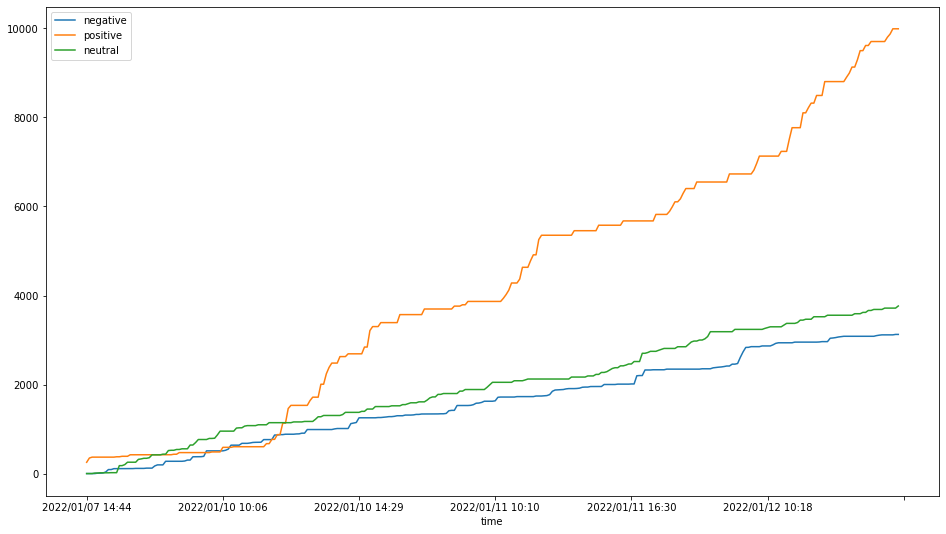

In [170]:
result.plot(figsize=(16,9))